# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Units
units = "imperial"
#Url for API call for Celsius units
url= "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval")
print("----------------------------")

#Empty lists
city_name = []
city_lats = []
city_lngs = []
city_temp = []
city_maxtemps = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
date = []

# Initialize count variables for record and set
item = 1
set0 = 1

#for loop 
for city in cities:
    #Query url
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    #Response as json
    data = requests.get(query_url).json()
    #print(data)
    
    #Data into lists using exception
    try:
        print(f"Processing Record {item} of Set {set0} | {city}")  
        city_name.append(data["name"])
        city_country.append(data["sys"]["country"])
        city_lats.append(data["coord"]["lat"])
        city_lngs.append(data["coord"]["lon"])    
        #city_temp.append(data["main"]["temp"])
        city_maxtemps.append(data["main"]["temp_max"])
        city_humidity.append(data["main"]["humidity"])
        city_cloudiness.append(data["clouds"]["all"])
        city_windspeed.append(data["wind"]["speed"])
        date.append(data["dt"])
        
        item += 1
        
        #If statement to limit API calls to 50
        if item > 50:
            set0 += 1
            item = 1
            time.sleep(1)
    
    except:
        print(f"City '{city}' not found. Skipping...")
        
        

print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")
        

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | vanimo
Processing Record 6 of Set 1 | belmonte
Processing Record 7 of Set 1 | nome
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | weare
Processing Record 10 of Set 1 | taltal
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | kurilsk
Processing Record 13 of Set 1 | kalmunai
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | dzhusaly
City 'dzhusaly' not found. Skipping...
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | springfield
Processing Record 18 of Set 1 | russell
Processing Record 19 of Set 1 | lagoa
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | mar del plata
Processing Record 22

Processing Record 12 of Set 4 | tutoia
Processing Record 13 of Set 4 | meulaboh
Processing Record 14 of Set 4 | saint-philippe
Processing Record 15 of Set 4 | atbasar
Processing Record 16 of Set 4 | spas-klepiki
Processing Record 17 of Set 4 | hokitika
Processing Record 18 of Set 4 | mpika
Processing Record 19 of Set 4 | beidao
Processing Record 20 of Set 4 | san-pedro
Processing Record 21 of Set 4 | chiredzi
Processing Record 22 of Set 4 | karratha
Processing Record 23 of Set 4 | sioux lookout
Processing Record 24 of Set 4 | ostrovnoy
Processing Record 25 of Set 4 | bibiani
Processing Record 26 of Set 4 | amderma
City 'amderma' not found. Skipping...
Processing Record 26 of Set 4 | sept-iles
Processing Record 27 of Set 4 | kaitangata
Processing Record 28 of Set 4 | conakry
Processing Record 29 of Set 4 | isetskoye
Processing Record 30 of Set 4 | kodinsk
Processing Record 31 of Set 4 | nouakchott
Processing Record 32 of Set 4 | east london
Processing Record 33 of Set 4 | rawson
Process

Processing Record 40 of Set 7 | waipawa
Processing Record 41 of Set 7 | atar
Processing Record 42 of Set 7 | pangai
Processing Record 43 of Set 7 | tumannyy
City 'tumannyy' not found. Skipping...
Processing Record 43 of Set 7 | georgetown
Processing Record 44 of Set 7 | sitka
Processing Record 45 of Set 7 | san cristobal
Processing Record 46 of Set 7 | sao mateus
Processing Record 47 of Set 7 | high rock
Processing Record 48 of Set 7 | barawe
City 'barawe' not found. Skipping...
Processing Record 48 of Set 7 | bar harbor
Processing Record 49 of Set 7 | polyarnyy
Processing Record 50 of Set 7 | bandarbeyla
Processing Record 1 of Set 8 | tuatapere
Processing Record 2 of Set 8 | maniitsoq
Processing Record 3 of Set 8 | lavrentiya
Processing Record 4 of Set 8 | pimentel
Processing Record 5 of Set 8 | rocha
Processing Record 6 of Set 8 | wilmington
Processing Record 7 of Set 8 | davila
Processing Record 8 of Set 8 | alta
Processing Record 9 of Set 8 | saint-pierre
Processing Record 10 of Se

Processing Record 13 of Set 11 | sembakung
Processing Record 14 of Set 11 | verkhnedneprovskiy
Processing Record 15 of Set 11 | puro
Processing Record 16 of Set 11 | raga
Processing Record 17 of Set 11 | erenhot
Processing Record 18 of Set 11 | valea mare-pravat
City 'valea mare-pravat' not found. Skipping...
Processing Record 18 of Set 11 | kalininsk
Processing Record 19 of Set 11 | kulpahar
Processing Record 20 of Set 11 | glen cove
Processing Record 21 of Set 11 | yuci
Processing Record 22 of Set 11 | washougal
Processing Record 23 of Set 11 | kirakira
Processing Record 24 of Set 11 | baykit
Processing Record 25 of Set 11 | bartica
Processing Record 26 of Set 11 | leticia
Processing Record 27 of Set 11 | staryy nadym
Processing Record 28 of Set 11 | pecos
Processing Record 29 of Set 11 | dandong
Processing Record 30 of Set 11 | hay river
Processing Record 31 of Set 11 | parnarama
Processing Record 32 of Set 11 | samarkand
Processing Record 33 of Set 11 | avera
Processing Record 34 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create Dataframe
cities_df = pd.DataFrame({"City": city_name,
                          "Country": city_country,
                          "Date": date,
                          "Lat": city_lats,
        
                          "Lng": city_lngs,
                          "Max Temp (F)": city_maxtemps,
                          "Humidity (%)": city_humidity,
                          "Cloudiness (%)": city_cloudiness,
                          "Wind Speed (mph)": city_windspeed,
                                })


cities_df.to_csv("../output_data/cities.csv", index=True, index_label="City ID", header=True)
cities_df.head()

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Ancud,CL,1599271536,-41.87,-73.82,39.99,91,100,5.75
1,Bluff,NZ,1599271755,-46.60,168.33,52.93,68,81,10.31
2,Castro,BR,1599271755,-24.79,-50.01,61.83,79,0,6.11
3,Punta Arenas,CL,1599271756,-53.15,-70.92,37.40,86,100,5.82
4,Vanimo,PG,1599271756,-2.67,141.30,81.23,77,100,3.91


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#Cities that have humidity over 100%
humidity_over_100 = cities_df.loc[cities_df["Humidity (%)"] > 100, :]
humidity_over_100

#There are no Cities within humidity over 100%

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


# Conclusion 1
* There are no cities within humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

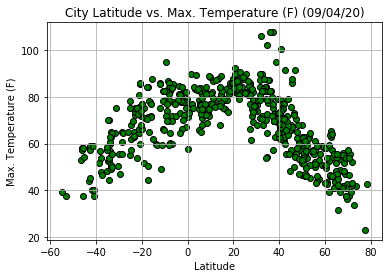

In [6]:
# Convert to floats and store Lat vs Max Temp. as x and y values
x_values = cities_df['Lat'].astype('float')
y_values = cities_df['Max Temp (F)'].astype('float')

# Plot scatter plot
plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="black")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')
plt.grid()
plt.title("City Latitude vs. Max. Temperature (F) (09/04/20)")

plt.savefig("../Images/City Latitude Vs Max. Temperature (F).png")

plt.show()

We can see there is a relation and symmetry between Latitude and Max. Temperature.

## Latitude vs. Humidity Plot

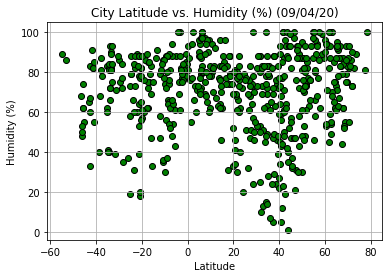

In [7]:
# Convert to floats and store Lat vs Humidity (%) as x and y values
x_values = cities_df['Lat'].astype('float')
y_values = cities_df['Humidity (%)'].astype('float')

# Plot scatter plot
plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="black")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title("City Latitude vs. Humidity (%) (09/04/20)")

plt.savefig("../Images/City Latitude Vs Humidity (%).png")

plt.show()

We can see there is no relation between Latitude and Humidity.

## Latitude vs. Cloudiness Plot

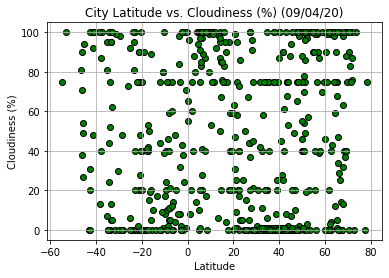

In [8]:
# Convert to floats and store Lat vs Cloudiness (%) as x and y values
x_values = cities_df['Lat'].astype('float')
y_values = cities_df['Cloudiness (%)'].astype('float')

# Plot scatter plot
plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="black")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title("City Latitude vs. Cloudiness (%) (09/04/20)")

plt.savefig("../Images/City Latitude Vs Cloudiness (%).png")

plt.show()

We can see there is no relation between Latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

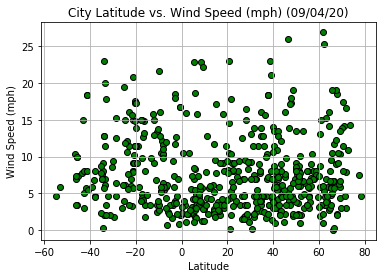

In [9]:
# Convert to floats and store Lat vs Wind Speed (mph) as x and y values
x_values = cities_df['Lat'].astype('float')
y_values = cities_df['Wind Speed (mph)'].astype('float')

# Plot scatter plot
plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="black")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title("City Latitude vs. Wind Speed (mph) (09/04/20)")

plt.savefig("../Images/City Latitude Vs Wind Speed (mph).png")

plt.show()

We can see there is no relation between Latitude and Wind Speed.

## Linear Regression

In [10]:
# create new df's for northern and southern hempishere
northern_df = cities_df[cities_df['Lat'] > 0]
southern_df = cities_df[cities_df['Lat'] < 0]

# Conclusion 2

* We can see that Northern and Southern Max. Temperature becomes nearly at the 0 Latitude point.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

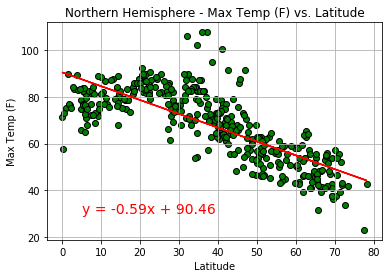

R squared: 0.5955600685289094


In [11]:
x_value = northern_df['Lat'].astype('float')
y_value = northern_df['Max Temp (F)'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_value, y_value, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (5, 30), color='red', fontsize= 14)
# Label plot
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.savefig("../Images/Northern Max Temp Vs Lat.png")
plt.show()

# Print r square value
print(f"R squared: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

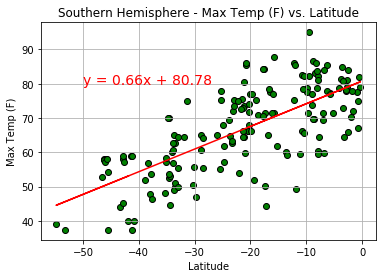

R squared: 0.5132417237867539


In [12]:
x_value = southern_df['Lat'].astype('float')
y_value = southern_df['Max Temp (F)'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_value, y_value, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (-50,80), color='red', fontsize= 14)
# Label plot
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.savefig("../Images/Southern Max Temp Vs Lat.png")
plt.show()

# Print r square value
print(f"R squared: {rvalue**2}")

# Conclusion 3

* We can see there is NO correlation between Humidity and Latitude on Northern and Southern hemispheres.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

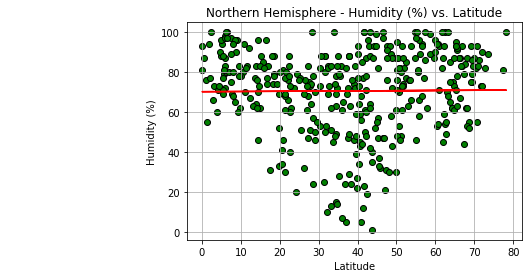

R squared: 9.199098591360319e-05


In [13]:
x_value = northern_df['Lat'].astype('float')
y_value = northern_df['Humidity (%)'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_value, y_value, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (-50,80), color='red', fontsize= 14)
# Label plot
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../Images/Northern Humidity (%) Vs Lat.png")
plt.show()

# Print r square value
print(f"R squared: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

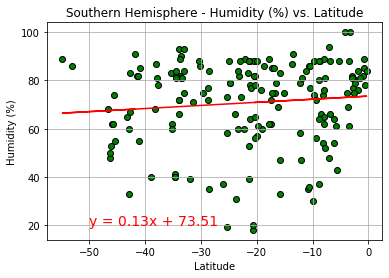

R squared: 0.009819563513869973


In [14]:
x_value = southern_df['Lat'].astype('float')
y_value = southern_df['Humidity (%)'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_value, y_value, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (-50,20), color='red', fontsize= 14)
# Label plot
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../Images/Southern Humidity (%) Vs Lat.png")
plt.show()

# Print r square value
print(f"R squared: {rvalue**2}")

# Conclusion 4

* We can see there is NO correlation between Cloudiness and latitude on Northern and Southern hemispheres.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

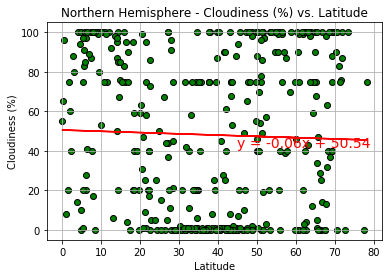

R squared: 0.0010264260093900582


In [15]:
x_value = northern_df['Lat'].astype('float')
y_value = northern_df['Cloudiness (%)'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_value, y_value, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (45,42), color='red', fontsize= 14)
# Label plot
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../Images/Northern Cloudiness (%) Vs Lat.png")
plt.show()

# Print r square value
print(f"R squared: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

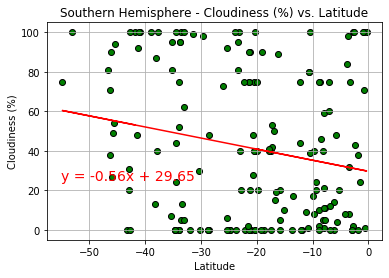

R squared: 0.04096262352211498


In [16]:
x_value = southern_df['Lat'].astype('float')
y_value = southern_df['Cloudiness (%)'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_value, y_value, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (-55,25), color='red', fontsize= 14)
# Label plot
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../Images/Southern Cloudiness (%) Vs Lat.png")
plt.show()

# Print r square value
print(f"R squared: {rvalue**2}")

# Conclusion 4

* We can see there is NO correlation between Wind Speed and Latitude on Northern and Southern hemispheres but there is a little portion of points that shows us that in the Southern hemisphere there are some wind if we get closer to the Latitude 0.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

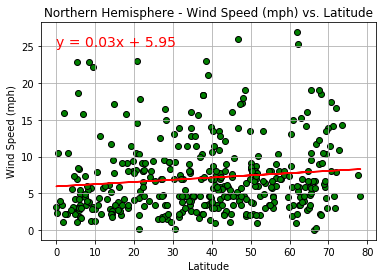

R squared: 0.01479388480252849


In [17]:
x_value = northern_df['Lat'].astype('float')
y_value = northern_df['Wind Speed (mph)'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_value, y_value, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (0,25), color='red', fontsize= 14)
# Label plot
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../Images/Northern Wind Speed (mph) Vs Lat.png")
plt.show()

# Print r square value
print(f"R squared: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

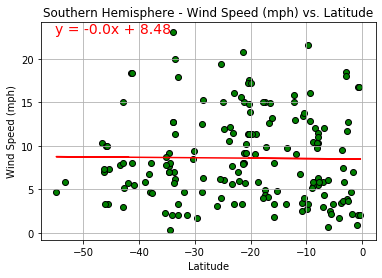

R squared: 0.0001764198086277125


In [18]:
x_value = southern_df['Lat'].astype('float')
y_value = southern_df['Wind Speed (mph)'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_value, y_value, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (-55,23), color='red', fontsize= 14)
# Label plot
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../Images/Southern Wind Speed (mph) Vs Lat.png")
plt.show()

# Print r square value
print(f"R squared: {rvalue**2}")